### Atividade

Para resolver as questões abaixo utilizar o dataset [Titanic](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv).

In [ ]:
# importando a biblioteca
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
# verificando as base disponíveis no seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [49]:
# 01 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, 
#coluna embark_town no dataset.

t = sns.load_dataset('titanic')
t.info()  # puxando todas as informações do arquivo 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



# 01 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque,  coluna embark_town no dataset.

In [51]:
t['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

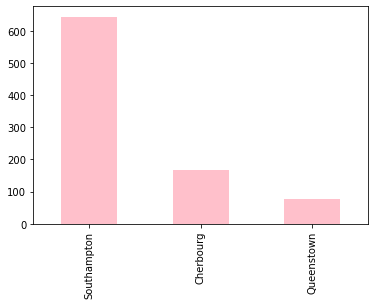

In [53]:
t['embark_town'].value_counts().plot.bar(color='pink');

# 02 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town 
#no dataset separados pelo sexo, coluna sex no dataset.

# agrupando os dados por ilha e sexo

In [54]:
# 02 - Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town 
#no dataset separados pelo sexo, coluna sex no dataset.

# agrupando os dados por ilha e sexo

t.groupby(['embark_town','sex']).count()

survived  pclass  age  sibsp  parch  fare  embarked  \
embark_town sex                                                           
Cherbourg   female        73      73   61     73     73    73        73   
            male          95      95   69     95     95    95        95   
Queenstown  female        36      36   12     36     36    36        36   
            male          41      41   16     41     41    41        41   
Southampton female       203     203  186    203    203   203       203   
            male         441     441  368    441    441   441       441   

                    class  who  adult_male  deck  alive  alone  
embark_town sex                                                 
Cherbourg   female     73   73          73    37     73     73  
            male       95   95          95    32     95     95  
Queenstown  female     36   36          36     2     36     36  
            male       41   41          41     2     41     41  
Southampton female    203  203         203    56    203    203  
            male      441  441         441    72    441    441

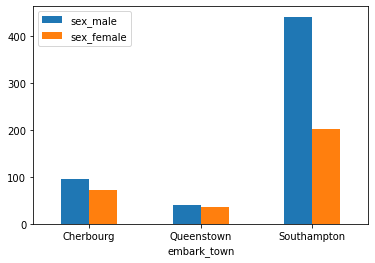

In [57]:
# listando agrupammento em gráfico de barras
t_dummy = pd.get_dummies(t, columns=['sex'])
t_dummy.groupby('embark_town')[['sex_male', 'sex_female']].sum().plot.bar(rot=0);

# 03 - Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

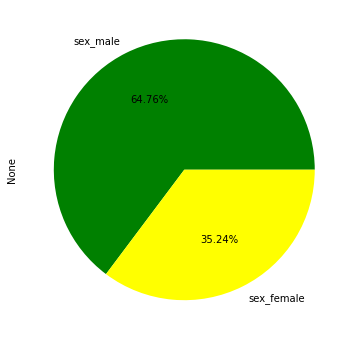

In [60]:
t_dummy[['sex_male', 'sex_female']].sum().plot.pie(subplots=True, figsize=(16, 6), autopct ='%.2f%%', colors = ['green', 'yellow']);


#  04 -  Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

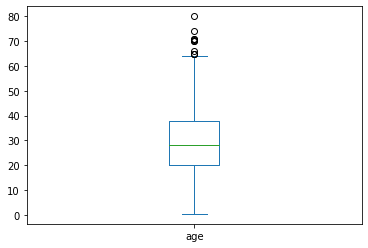

In [61]:
t.age.plot.box();

# 05 - Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

In [64]:
t['pclass'].value_counts().sort_values()

2    184
1    216
3    491
Name: pclass, dtype: int64

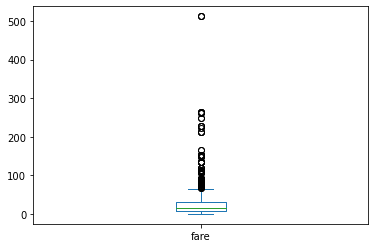

In [62]:
t.fare.plot.box();

# 06 -  Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

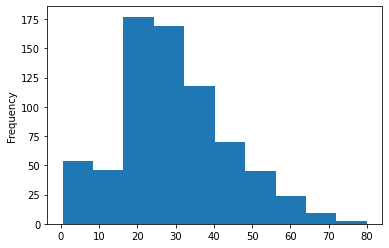

In [66]:
t['age'].plot.hist();

# 07 -Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.



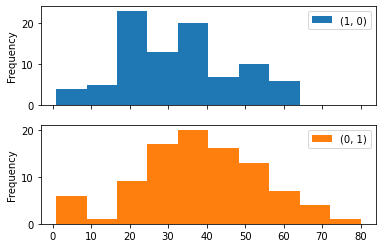

In [67]:
t_dummy.dropna().reset_index().pivot('index', ['sex_female', 'sex_male'], 'age').plot.hist(subplots = True);
